# Hands-On: FuseMedML and MultiModality

Welcome!

This notebook will guide you through the hands-on session.

## Session take-away
* Introduction to FuseMedML framework
* Introduction to multi-modality data and tasks
* Train multimodality based deep-learning model: demonstration of the integration of imaging and clinical data in skin lesion classification task


------------------
## FuseMedML
[![Github repo](https://img.shields.io/static/v1?label=GitHub&message=FuseMedML&color=brightgreen)](https://github.com/IBM/fuse-med-ml)

[![PyPI version](https://badge.fury.io/py/fuse-med-ml.svg)](https://badge.fury.io/py/fuse-med-ml)

[![Slack channel](https://img.shields.io/badge/support-slack-slack.svg?logo=slack)](https://join.slack.com/t/fusemedml/shared_invite/zt-xr1jaj29-h7IMsSc0Lq4qpVNxW97Phw)

[![Open Source](https://badges.frapsoft.com/os/v1/open-source.svg)](https://github.com/IBM/fuse-med-ml)


FuseMedML is an open-source python-based framework designed to enhance collaboration and accelerate discoveries in Fused Medical data through advanced Machine Learning technologies. 

Initial version is PyTorch-based and focuses on deep learning on medical imaging.


### **FuseMedML Key Concepts in a Nutshell**
### Decoupling
The decoupling is achieved by the fact that, in most cases, the objects do not interact directly. Instead, the information and data are routed between components using *namespaces* (examples below). 

Meaning, each object extracts its input from and saves its output into a dictionary named `batch_dict`. 

`batch_dict` aggregates the outputs of all the objects through a single batch. 

<br />

**Example of the decoupling approach:**
```python
FuseMetricAUC(pred_name='model.output.classification', target_name='data.gt.classification')  
```

`FuseMetricAUC` will read the required tensors to compute AUC from `batch_dict`. The relevant dictionary keys are `pred_name` and `target_name`. 

This approach allows writing a generic metric which is completely independent of the model and data extractor. 

In addition, it allows to easily re-use this object in a plug & play manner without adding extra code. 

Such an approach also allows us to use it several times in case we have multiple heads/tasks.

<br />


When a batch is completed, only the required key-value pairs from `batch_dict`, such as the loss values, will be collected in another dictionary named `epoch_results`. 

Both `batch_dict` and `epoch_results` are nested dictionaries. To easily access the data stored in those dictionaries, use `FuseUtilsHierarchicalDict`:

```python
FuseUtilsHierarchicalDict.get(batch_dict, ‘model.output.classification’)
``` 

will return `batch_dict[‘model’][‘output’][‘classification’]`


### Share and Reuse

A common generic implementation, you can reuse, is provided for most components in the pipeline. 

The naming convention for the common implementation is `Fuse***Default` 

FuseMedML comes with a large collection of components that grow with each new project. Some of them are entirely generic and the others are domain specific.


Don't forget to **contribute** back and **share** them. 


### Use PyTorch directly and alternative frameworks

FuseMedML uses and extends PyTorch only when required by the user. 
You can mix FuseMedML with PyTorch code, components from alternative frameworks and other popular GitHub projects. 



---------
## Multimodality
Radiologists never diagnose based solely on a single modality. The decision is made by combining information from various sources. Therefore, it is important to include such information in machine learning algorithms. 

Radiologists take into account clinical information such as the reason the scan was ordered. If needed, they can also examine other clinical information from the electronic health records of the hospital.  

Prior images are another type of data that is routinely used in radiology reading. Radiologists will often compare a current study with imaging or other tests done in the past to assess change.

It is also a common practice to consider findings from several imaging modalities when making a diagnosis. Each reveals different aspects and attributes of the suspicious finding.

In this session, we will demonstrate two simple yet effective methods to integrate clinical data.
In all cases and in general, the clinical data should first be pre-processed, normalized, etc.

<img src="arch.png" alt="drawing" width="100%"/>

* **Imaging only implementation**

* **Imaging and Tabular data - concatenate tabular data after image feature extraction**

    The tabular data is integrated after feature extraction, done by a convolutional network followed by a pooling layer that extracts non-spatial features from the image.


* **Imaging and Tabular data - concatenate directly with the image**

    The tabular data is integrated at the beginning of the network by adding more channels to the input image. Each channel represents a single bit in the one-hot vector. 

    This method of integrating clinical features provides the network with the ability to extract better features using the backbone, in contrast to the standard way of integrating this data only after feature extraction.




-------------
## Task - ISIC 2019 challenge to classify dermoscopic images and clinical data among nine different diagnostic categories.

This task was chosen for demonstration since the data is simple and public, which will make the session more effective.

We explored the effectiveness of each method in two different tasks:
* Article: "Context in medical imaging: the case of focal liver lesion classification" - soon to be published
* FuseMedML example on [Duke dataset](https://sites.duke.edu/mazurowski/resources/breast-cancer-mri-dataset/) - will be published in FuseMedML repository.

Skin cancer is the most common cancer globally, with melanoma being the most deadly form. 

Dermoscopy is a skin imaging modality that has demonstrated improvement for the diagnosis of skin cancer compared to unaided visual inspection. 

<!-- However, clinicians should receive adequate training for those improvements to be realized.

In order to make expertise more widely available, the International Skin Imaging Collaboration (ISIC) has developed the ISIC Archive, 

an international repository of dermoscopic images, for both the purposes of clinical training, and for supporting technical research toward automated algorithmic analysis by hosting the ISIC Challenges.-->

The goal for ISIC 2019 is to classify dermoscopic images among eight different diagnostic categories:

* Melanoma
* Melanocytic nevus
* Basal cell carcinoma
* Actinic keratosis
* Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
* Dermatofibroma
* Vascular lesion
* Squamous cell carcinoma
* None of the others

25,331 images are available for training across 8 different categories.

Two tasks were available for participation:
* classify dermoscopic images without meta-data,
* classify images with additional available meta-data, including age, gender and anatomic site

[1] Tschandl P., Rosendahl C. & Kittler H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 doi.10.1038/sdata.2018.161 (2018)

[2] Noel C. F. Codella, David Gutman, M. Emre Celebi, Brian Helba, Michael A. Marchetti, Stephen W. Dusza, Aadi Kalloo, Konstantinos Liopyris, Nabin Mishra, Harald Kittler, Allan Halpern: “Skin Lesion Analysis Toward Melanoma Detection: A Challenge at the 2017 International Symposium on Biomedical Imaging (ISBI), Hosted by the International Skin Imaging Collaboration (ISIC)”, 2017; arXiv:1710.05006.

[3] Marc Combalia, Noel C. F. Codella, Veronica Rotemberg, Brian Helba, Veronica Vilaplana, Ofer Reiter, Allan C. Halpern, Susana Puig, Josep Malvehy: “BCN20000: Dermoscopic Lesions in the Wild”, 2019; arXiv:1908.02288.

------------
## Installation Details - Google Colab

### **Enable GPU Support**

To use GPU through Google Colab, change the runtime mode to GPU:

From the "Runtime" menu select "Change Runtime Type", choose "GPU" from the drop-down menu and click "SAVE"
When asked, reboot the system.

### **Install FuseMedML**

In [ ]:
!git clone https://github.com/IBM/fuse-med-ml.git
%cd fuse-med-ml
!git checkout multimodality_tutorial
!pip install -e .
%cd fuse_examples/tutorials/multimodality_image_clinical

**Please reboot the session when asked!**

In [ ]:
import os
%cd fuse-med-ml/fuse_examples/tutorials/multimodality_image_clinical
!export PYTHONPATH=$PYTHONPATH:$(pwd)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from fuse.utils.utils_logger import fuse_logger_start
import logging
fuse_logger_start(output_path=None, console_verbose_level=logging.INFO)
size=400
print("Done")


----------------
### Data

(Don't forget to first follow the installation instructions listed at the beginning of the notebook)

In [ ]:
print("It might take few miuntes")

from download import download_and_extract_isic
download_and_extract_isic(golden_only=size<=400)

In [ ]:
# explain about FuseMedML data pipeline
from dataset import isic_2019_dataset

train_dl, valid_dl = isic_2019_dataset(size=size, reset_cache=True, post_cache_processing_func=None)


The original code can be found [here](https://github.com/IBM/fuse-med-ml/blob/multimodality_tutorial/fuse_examples/tutorials/multimodality_image_clinical/dataset.py).

<br/>

**In high level:**

Create data source:

```python
train_data_source = FuseSkinDataSource(...)
```

Create processors:

```python
input_processors = {
    'image': FuseSkinInputProcessor(...),
    'clinical': FuseProcessorCSV(...)
}

gt_processors = {
    'gt_global': FuseSkinGroundTruthProcessor(...)
}
```

Define augmentations pipline:
```python
augmentation_pipeline = [
    [
        ('data.input.image',),
        aug_op_affine,
        {'rotate': Uniform(-180.0, 180.0), 'translate': (RandInt(-50, 50), RandInt(-50, 50)), ...).
        {'apply': RandBool(0.9)}
    ],
    [
        ('data.input.image',),
        aug_op_color,
        {'add': Uniform(-0.06, 0.06), 'mul': Uniform(0.95, 1.05), 'gamma': Uniform(0.9, 1.1), ...),
        {'apply': RandBool(0.7)}
    ],
    [
        ('data.input.image',),
        aug_op_gaussian,
        {'std': 0.03},
        {'apply': RandBool(0.7)}
    ],
]

augmentor = FuseAugmentorDefault(augmentation_pipeline=augmentation_pipeline)
```

create pytorch dataset:

```python
train_dataset = FuseDatasetDefault(cache_dest=cache_dir,
                                   data_source=train_data_source,
                                   input_processors=input_processors,
                                   gt_processors=gt_processors,
                                   post_processing_func=post_cache_processing_func,
                                   augmentor=augmentor,
                                   visualizer=visualiser)
train_dataset.create()
```


Create pytorch dataloader:
```python
sampler = FuseSamplerBalancedBatch(dataset=train_dataset, balanced_class_name='data.gt.gt_global.tensor', ...)

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_sampler=sampler, collate_fn=train_dataset.collate_fn, ...)
```


In [4]:
sample_index = 10
print(train_dl.dataset[sample_index])

{'data': {'descriptor': 'ISIC_0072650', 'input': {'image': tensor([[[ 0.0477, -0.0029,  0.0652,  ...,  0.0614,  0.0794,  0.0952],
         [ 0.0961,  0.0680,  0.0677,  ...,  0.0327,  0.0476,  0.0483],
         [ 0.0449,  0.0732,  0.0557,  ...,  0.0413,  0.0540,  0.0747],
         ...,
         [ 0.0415,  0.0711,  0.0938,  ...,  0.0398,  0.0615,  0.0708],
         [ 0.0515,  0.0014,  0.0818,  ...,  0.0877,  0.0531,  0.0778],
         [ 0.0124,  0.0945,  0.0506,  ...,  0.0432,  0.0467,  0.0676]],

        [[ 0.0082,  0.0521,  0.0621,  ...,  0.1180,  0.0343,  0.0458],
         [ 0.0999,  0.0760,  0.0497,  ...,  0.0106,  0.0216,  0.0907],
         [ 0.0380,  0.0996,  0.0328,  ...,  0.0058,  0.0573,  0.0421],
         ...,
         [ 0.0412,  0.0285,  0.0106,  ...,  0.0930,  0.0219,  0.1018],
         [ 0.0716,  0.0491,  0.0796,  ...,  0.0650,  0.0488,  0.0383],
         [ 0.0588,  0.0364,  0.0604,  ...,  0.0610,  0.0579,  0.0366]],

        [[ 0.0283,  0.0313,  0.0696,  ...,  0.0265,  0.07

In [5]:
print(train_dl.dataset.summary(["data.gt.gt_global.tensor"]))

100%|██████████| 280/280 [00:03<00:00, 93.08it/s]

Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f3a6e6a7240>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f3a6d9f6438>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f38a5637278>}}
Cache destination:
------------------
cache
Augmentor:
----------
Class = (<fuse.data.augmentor.augmentor_default.FuseAugmentorDefault object at 0x7f3a6e69b160>, <class 'fuse.data.augmentor.augmentor_default.FuseAugmentorDefault'>)
Pipeline = [[('data.input.image',), '<function aug_op_affine at 0x7f3891a79a60>', {'rotate': 'RandUniform [-180.0 - 180.0] ', 'translate': ('RandInt [-50 - 50] ', 'RandInt [-50 - 50] '), 'flip': ('RandBool p=0.3] ', 'RandBool p=0.3] '), 'scale': 'RandUniform [0.9 - 1.1] '}, {'apply': 'RandBool p=0.9] '}], [('data.input.image',), '<function aug_op_color at 0x7f38293b10d0>', {'add': 'RandU

------------------------------------------
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
------------------------------------------


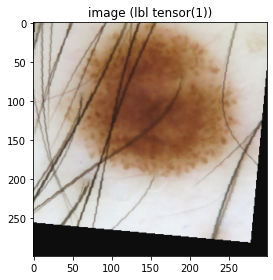

In [6]:
%matplotlib inline
sample_index = 10
train_dl.dataset.visualize(sample_index)

------------------------------------------
original
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
augmented
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
------------------------------------------


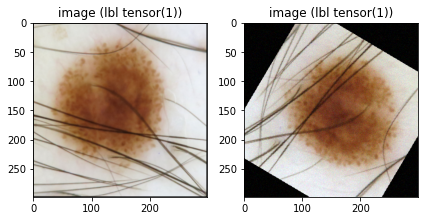

In [7]:
sample_index = 10
train_dl.dataset.visualize_augmentation(sample_index)

### Imaging Only Implementation

In [9]:

from fuse.models.model_default import FuseModelDefault
from fuse.models.heads.head_global_pooling_classifier import FuseHeadGlobalPoolingClassifier
from fuse.models.backbones.backbone_inception_resnet_v2 import FuseBackboneInceptionResnetV2
from fuse.models.backbones.backbone_resnet import FuseBackboneResnet

model = FuseModelDefault(
    conv_inputs=(('data.input.image', 3),),
    backbone=FuseBackboneInceptionResnetV2(input_channels_num=3, pretrained_weights_url=None),
    # backbone=FuseBackboneResnet(in_channels=3),
    heads=[
        FuseHeadGlobalPoolingClassifier(head_name='head_0',
                                        dropout_rate=0.5,
                                        conv_inputs=[('model.backbone_features', 384)],
                                        layers_description=(256,),
                                        num_classes=8,
                                        pooling="avg"),
    ]
)

# Show how to: change backbone and num_features to 512, add layers to the classifier head

In [10]:
import torch.nn.functional as F
from fuse.losses.loss_default import FuseLossDefault
from fuse.metrics.classification.metric_auc import FuseMetricAUC
from fuse.metrics.classification.metric_accuracy import FuseMetricAccuracy
from fuse.metrics.classification.metric_confusion import FuseMetricConfusion

# ====================================================================================
#  Loss
# ====================================================================================
losses = {
    'cls_loss': FuseLossDefault(pred_name='model.logits.head_0', target_name='data.gt.gt_global.tensor',
                                callable=F.cross_entropy, weight=1.0)
}

# ====================================================================================
# Metrics
# ====================================================================================
metrics = {
    'auc': FuseMetricAUC(pred_name='model.output.head_0', target_name='data.gt.gt_global.tensor'),
    'accuracy': FuseMetricAccuracy(pred_name='model.output.head_0', target_name='data.gt.gt_global.tensor'),
    "balanced_acc": FuseMetricConfusion(pred_name='model.output.head_0', target_name='data.gt.gt_global.tensor', metrics=('sensitivity',))
}

best_epoch_source = {
    'source': 'metrics.balanced_acc.sensitivity_macro_avg',  # can be any key from losses or metrics dictionaries
    'optimization': 'max',  # can be either min/max
}

# show how to: select best model according to different mertic 'metrics.auc.macro_avg'

In [13]:
import torch.optim as optim
from fuse.managers.manager_default import FuseManagerDefault
from fuse.managers.callbacks.callback_tensorboard import FuseTensorboardCallback

# create optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-5,
                        weight_decay=0.001)

# create scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

#set
callbacks = {
    FuseTensorboardCallback(model_dir='model_dir')
}
# train from scratch
manager = FuseManagerDefault(output_model_dir="model_dir", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(net=model,
                    optimizer=optimizer,
                    losses=losses,
                    metrics=metrics,
                    best_epoch_source=best_epoch_source,
                    lr_scheduler=scheduler,
                    callbacks=callbacks,
                    train_params={'num_epochs': 4},
                    output_model_dir="model_dir")

# Start training
manager.train(train_dataloader=train_dl,
                validation_dataloader=valid_dl)

Key device not found in config parameter, setting value to default (cuda)
Key virtual_batch_size not found in config parameter, setting value to default (1)
Key gap_between_saving_epochs not found in config parameter, setting value to default (5)
Key start_saving_epochs not found in config parameter, setting value to default (80)
Key lr_sch_target not found in config parameter, setting value to default (train.losses.total_loss)
Total number of parameters in model:11,822,896, trainable parameters:11,822,896
Train Dataset Summary:
Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f3a6e6a7240>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f3a6d9f6438>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f38a5637278>}}
Cache destination:
------------------
cache
Augmentor:
----------
Class = (<fuse.data.a

100%|██████████| 15/15 [00:00<00:00, 44.38it/s]


Start training on epoch 1


100%|██████████| 88/88 [00:03<00:00, 22.11it/s]


Start validation on epoch 1


100%|██████████| 15/15 [00:00<00:00, 33.71it/s]

This is the best epoch ever (metrics.balanced_acc.sensitivity_macro_avg = 0.09398781043517884)


Stats for epoch: 1 (Currently the best epoch for source metrics.balanced_acc.sensitivity_macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.0979                                    | 2.0979                                    | 1.7959                                    |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.to

100%|██████████| 88/88 [00:03<00:00, 22.05it/s]


Start validation on epoch 2


100%|██████████| 15/15 [00:00<00:00, 45.10it/s]


This is the best epoch ever (metrics.balanced_acc.sensitivity_macro_avg = 0.14493905217589428)
Stats for epoch: 2 (Currently the best epoch for source metrics.balanced_acc.sensitivity_macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.1722                                    | 2.1722                                    | 1.6565                                    |
---------------------------------------------------------------------------------------------

100%|██████████| 88/88 [00:03<00:00, 22.28it/s]


Start validation on epoch 3


100%|██████████| 15/15 [00:00<00:00, 40.00it/s]


Stats for epoch: 3 (Best epoch is 2 for source metrics.balanced_acc.sensitivity_macro_avg)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.1722                                    | 2.0219                                    | 1.5651                                    |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.total_loss  

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir model_dir
from tensorboard import notebook
notebook.list() # View open TensorBoard instances
notebook.display(port=6006, height=500) 



### Imaging and Tabular data - concatenate tabular data after image feature extraction ###

In [13]:
from fuse.utils.utils_hierarchical_dict import FuseUtilsHierarchicalDict
import torch
from dataset import ANATOM_SITE_INDEX, SEX_INDEX

### Generate Data
def post_cache_processing_clinical_encoding(sample_dict: dict) -> dict:
    age = FuseUtilsHierarchicalDict.get(sample_dict, 'data.input.clinical.age_approx')
    if age > 0 and age < 120:
        age = torch.tensor(age / 120.0).reshape(-1)
    else:
        age = torch.tensor(-1.0).reshape(-1)
    
    anatom_site = FuseUtilsHierarchicalDict.get(sample_dict, 'data.input.clinical.anatom_site_general')
    anatom_site_one_hot = torch.zeros(len(ANATOM_SITE_INDEX))
    if anatom_site in ANATOM_SITE_INDEX:
        anatom_site_one_hot[ANATOM_SITE_INDEX[anatom_site]] = 1
    
    sex = FuseUtilsHierarchicalDict.get(sample_dict, 'data.input.clinical.sex')
    sex_one_hot = torch.zeros(len(SEX_INDEX))
    if sex in SEX_INDEX:
        sex_one_hot[SEX_INDEX[sex]] = 1
    
    clinical_encoding = torch.cat((age, anatom_site_one_hot, sex_one_hot), dim=0)
    FuseUtilsHierarchicalDict.set(sample_dict, "data.input.clinical.all", clinical_encoding)

    return sample_dict


train_dl, valid_dl = isic_2019_dataset(size=size, reset_cache=False, post_cache_processing_func=post_cache_processing_clinical_encoding)

### Define model
model = FuseModelDefault(
    conv_inputs=(('data.input.image', 3),),
    backbone=FuseBackboneInceptionResnetV2(input_channels_num=3, pretrained_weights_url=None),
    heads=[
        FuseHeadGlobalPoolingClassifier(head_name='head_0',
                                        dropout_rate=0.5,
                                        conv_inputs=[('model.backbone_features', 384)],
                                        tabular_data_inputs=[("data.input.clinical.all", 11)],
                                        layers_description=(256,),
                                        tabular_layers_description=(128,),
                                        num_classes=8,
                                        pooling="avg"),
    ]
)



### Strart a training process
manager = FuseManagerDefault(output_model_dir="model_dir", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(net=model,
                    optimizer=optimizer,
                    losses=losses,
                    metrics=metrics,
                    best_epoch_source=best_epoch_source,
                    lr_scheduler=scheduler,
                    callbacks={},
                    train_params={'num_epochs': 2},
                    output_model_dir="model_dir")

# Start training
manager.train(train_dataloader=train_dl,
                validation_dataloader=valid_dl)

- Load and cache data:
FuseDatasetDefault: all 280 samples are already cached
- Load and cache data: Done
- Create sampler:


100%|██████████| 280/280 [00:02<00:00, 93.47it/s]

- Create sampler: Done
Train Data: Done {'attrs': 'bold'}
Validation Data: {'attrs': 'bold'}
- Load and cache data:
FuseDatasetDefault: all 120 samples are already cached


- Load and cache data: Done
Validation Data: Done {'attrs': 'bold'}
Key device not found in config parameter, setting value to default (cuda)
Key virtual_batch_size not found in config parameter, setting value to default (1)
Key gap_between_saving_epochs not found in config parameter, setting value to default (5)
Key start_saving_epochs not found in config parameter, setting value to default (80)
Key lr_sch_target not found in config parameter, setting value to default (train.losses.total_loss)
Total number of parameters in model:7,852,904, trainable parameters:7,852,904
Train Dataset Summary:
Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f72443fcf98>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f71cd3e8a58>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f72443f1278>}}
Cache destination:
--

100%|██████████| 15/15 [00:00<00:00, 25.12it/s]


Start training on epoch 1


100%|██████████| 88/88 [00:11<00:00,  7.72it/s]


Start validation on epoch 1


100%|██████████| 15/15 [00:00<00:00, 26.59it/s]


This is the best epoch ever (metrics.balanced_acc.sensitivity_macro_avg = 0.125)
Stats for epoch: 1 (Currently the best epoch for source metrics.balanced_acc.sensitivity_macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.0877                                    | 2.0877                                    | 2.0830                                    |
-----------------------------------------------------------------------------------------------------------

Model: model_dir


### Imaging and Tabular data - concatenate directly with the image

In [14]:
### Generate Data
def post_cache_processing_clinical_pad_to_image(sample_dict: dict) -> dict:
    sample_dict = post_cache_processing_clinical_encoding(sample_dict)
    clinical_encodging = FuseUtilsHierarchicalDict.get(sample_dict, "data.input.clinical.all")
    image = FuseUtilsHierarchicalDict.get(sample_dict, "data.input.image")

    clinical_data_spatial = clinical_encodging.reshape((clinical_encodging.shape + (1,1))).repeat((1,) + image.shape[1:]) # repeat and reshape to [num_features, H, W]
    image = torch.cat((image, clinical_data_spatial), dim=0) # concat to get [num_features + 3, H, W]

    FuseUtilsHierarchicalDict.set(sample_dict, "data.input.image", image)

    return sample_dict

train_dl, valid_dl = isic_2019_dataset(size=size, reset_cache=False, post_cache_processing_func=post_cache_processing_clinical_pad_to_image)

### Define model
model = FuseModelDefault(
    conv_inputs=(('data.input.image', 14),),
    backbone=FuseBackboneInceptionResnetV2(input_channels_num=14, pretrained_weights_url=None),
    heads=[
        FuseHeadGlobalPoolingClassifier(head_name='head_0',
                                        dropout_rate=0.5,
                                        conv_inputs=[('model.backbone_features', 384)],
                                        layers_description=(256,),
                                        num_classes=8,
                                        pooling="avg"),
    ]
)



### Strart a training process
manager = FuseManagerDefault(output_model_dir="model_dir", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(net=model,
                    optimizer=optimizer,
                    losses=losses,
                    metrics=metrics,
                    best_epoch_source=best_epoch_source,
                    lr_scheduler=scheduler,
                    callbacks={},
                    train_params={'num_epochs': 2},
                    output_model_dir="model_dir")

# Start training
manager.train(train_dataloader=train_dl,
                validation_dataloader=valid_dl)

- Load and cache data:
FuseDatasetDefault: all 280 samples are already cached
- Load and cache data: Done
- Create sampler:


100%|██████████| 280/280 [00:03<00:00, 86.71it/s]

- Create sampler: Done
Train Data: Done {'attrs': 'bold'}
Validation Data: {'attrs': 'bold'}
- Load and cache data:
FuseDatasetDefault: all 120 samples are already cached


- Load and cache data: Done
Validation Data: Done {'attrs': 'bold'}
Key device not found in config parameter, setting value to default (cuda)
Key virtual_batch_size not found in config parameter, setting value to default (1)
Key gap_between_saving_epochs not found in config parameter, setting value to default (5)
Key start_saving_epochs not found in config parameter, setting value to default (80)
Key lr_sch_target not found in config parameter, setting value to default (train.losses.total_loss)
Total number of parameters in model:7,821,768, trainable parameters:7,821,768
Train Dataset Summary:
Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f71cd3680f0>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f71cd401358>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f71cd4019e8>}}
Cache destination:
--

100%|██████████| 15/15 [00:00<00:00, 17.60it/s]

Start training on epoch 1



100%|██████████| 88/88 [00:12<00:00,  7.01it/s]


Start validation on epoch 1


100%|██████████| 15/15 [00:00<00:00, 18.11it/s]

This is the best epoch ever (metrics.balanced_acc.sensitivity_macro_avg = 0.125)


Stats for epoch: 1 (Currently the best epoch for source metrics.balanced_acc.sensitivity_macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.0699                                    | 2.0699                                    | 2.1037                                    |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.to

## Summary
### Multimodality 

There are many dierent sources of information beyond a single imaging modality that serve to inform radiologists when they are making diagnoses.
Therefore, it is important to include such information.

We saw few simple but powerful methods to integrate imaging and clinical data and how simple it is to explore when using FuseMedML.

### **Why use FuseMedML in general ?**

Successful deep learning R&D must rely on knowledge and experiments, accumulated over a wide variety of projects, and developed by different people and teams.

FuseMedML is an outstanding collaboration framework that allows you to rerun an experiment or reuse some of the capabilities originally written for different projects—all with minimal effort.

The framework’s unique software design provides many advantages, making it an ideal framework for deep-learning research and development in medical imaging:

* **Encourage sharing and collaboration** 

* **Rapid development**

* **Flexible, customizable, and scalable**

* **Standardized evaluation**

* **Medical imaging expertise** 

* **Compatibility with alternative frameworks**


<img src="fusemedml-release-plans.png" alt="drawing" width="100%"/>
